In [1]:
import graphviz 
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale, give_error

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle('./data/sj2_analise.pkl')

In [3]:
df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,s4
2013-12-01 03:30:00,33.624428,-0.428246,-0.020502,-1.298258,0.098587,1.826065,1.991653,0.163334
2013-12-01 03:40:00,33.205025,-0.546589,-0.118343,-1.063762,0.242001,4.588494,2.530373,0.165397
2013-12-01 03:50:00,32.539631,-0.772594,-0.226005,-0.650672,0.376269,7.786990,2.862830,0.168683
2013-12-01 04:00:00,31.469337,-1.082859,-0.310265,-0.110089,0.461174,10.972091,2.894375,0.173552
2013-12-01 04:10:00,29.995466,-1.429647,-0.346788,0.454509,0.468217,13.734955,2.621609,0.178917


# Árvore de Regressão
## Completa

In [4]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00206158 -0.00176234 -0.00175234 -0.00217614 -0.00198216 -0.00209713
 -0.00196175 -0.00132336 -0.00185229 -0.00130513] 

O erro quadrático médio foi: 0.001717
O erro quadrático total foi: 2.486277
O maior erro por previsão foi: 0.390732
O erro relativo foi 8.377031%

Error for the time series sample:
O erro quadrático médio foi: 0.006725
O erro quadrático total foi: 2.130514
O maior erro por previsão foi: 0.566327
O erro relativo foi 16.012569%


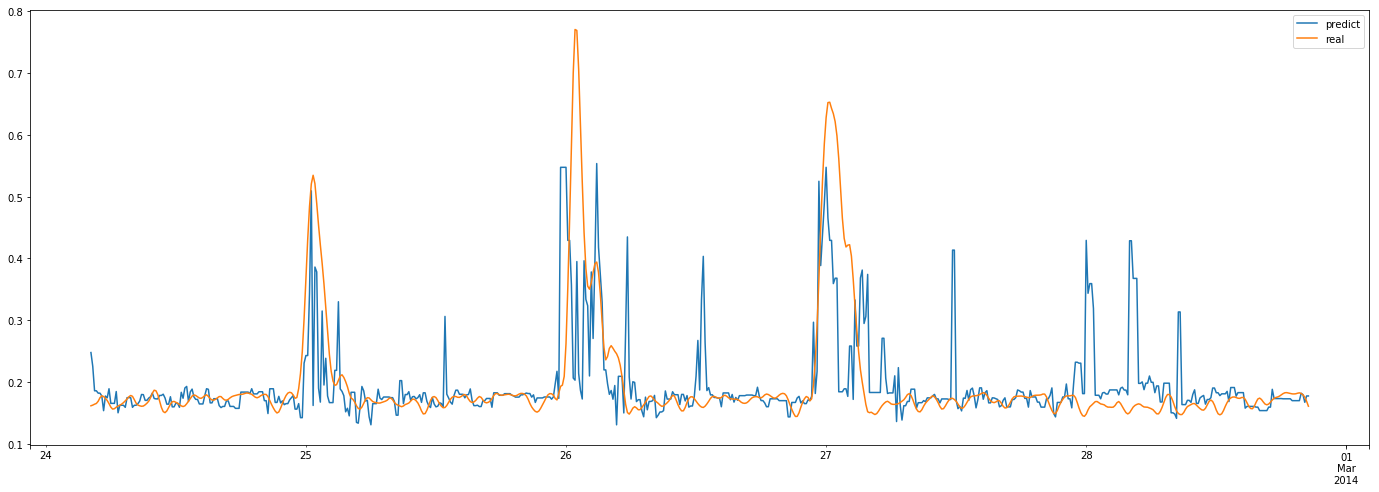

In [5]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem vtec

In [6]:
instances_set = ['vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.0025252  -0.00250436 -0.00196818 -0.00277146 -0.00277059 -0.00244045
 -0.00281747 -0.00175404 -0.0023923  -0.00235132] 

O erro quadrático médio foi: 0.002275
O erro quadrático total foi: 2.861667
O maior erro por previsão foi: 0.385051
O erro relativo foi 10.651636%

Error for the time series sample:
O erro quadrático médio foi: 0.007673
O erro quadrático total foi: 2.275869
O maior erro por previsão foi: 0.566327
O erro relativo foi 18.073455%


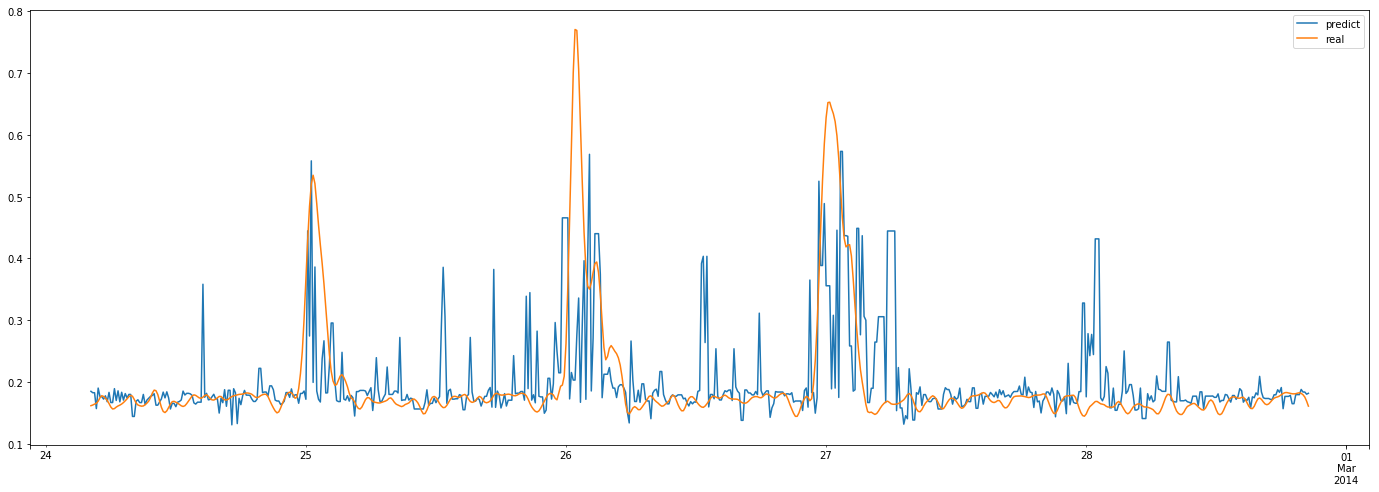

In [7]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal primeira do VTEC

In [8]:
instances_set = ['vtec', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00178497 -0.00196757 -0.00223778 -0.00208416 -0.00163975 -0.00191057
 -0.00226335 -0.00178432 -0.0018785  -0.00172474] 

O erro quadrático médio foi: 0.001702
O erro quadrático total foi: 2.475545
O maior erro por previsão foi: 0.390732
O erro relativo foi 8.710774%

Error for the time series sample:
O erro quadrático médio foi: 0.006752
O erro quadrático total foi: 2.134804
O maior erro por previsão foi: 0.498993
O erro relativo foi 16.477887%


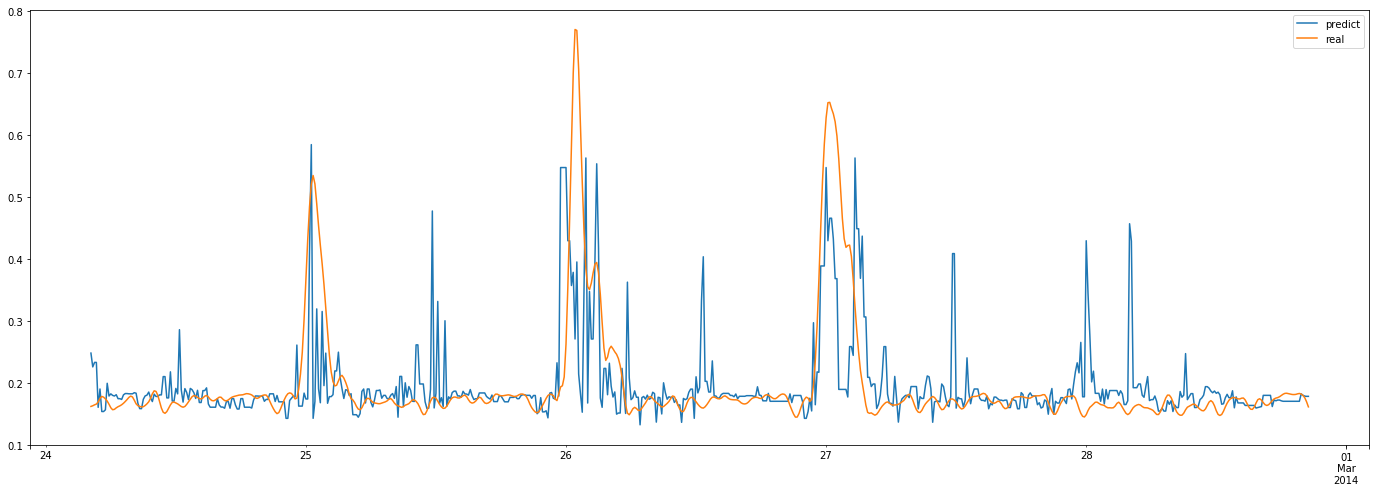

In [9]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal segunda do VTEC

In [10]:
instances_set = ['vtec', 'vtec_dt', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00241614 -0.00174304 -0.00195583 -0.00204072 -0.00259055 -0.00174675
 -0.00177673 -0.00131803 -0.00181135 -0.00162966] 

O erro quadrático médio foi: 0.001630
O erro quadrático total foi: 2.422652
O maior erro por previsão foi: 0.390732
O erro relativo foi 8.281425%

Error for the time series sample:
O erro quadrático médio foi: 0.008527
O erro quadrático total foi: 2.399145
O maior erro por previsão foi: 0.610553
O erro relativo foi 16.927903%


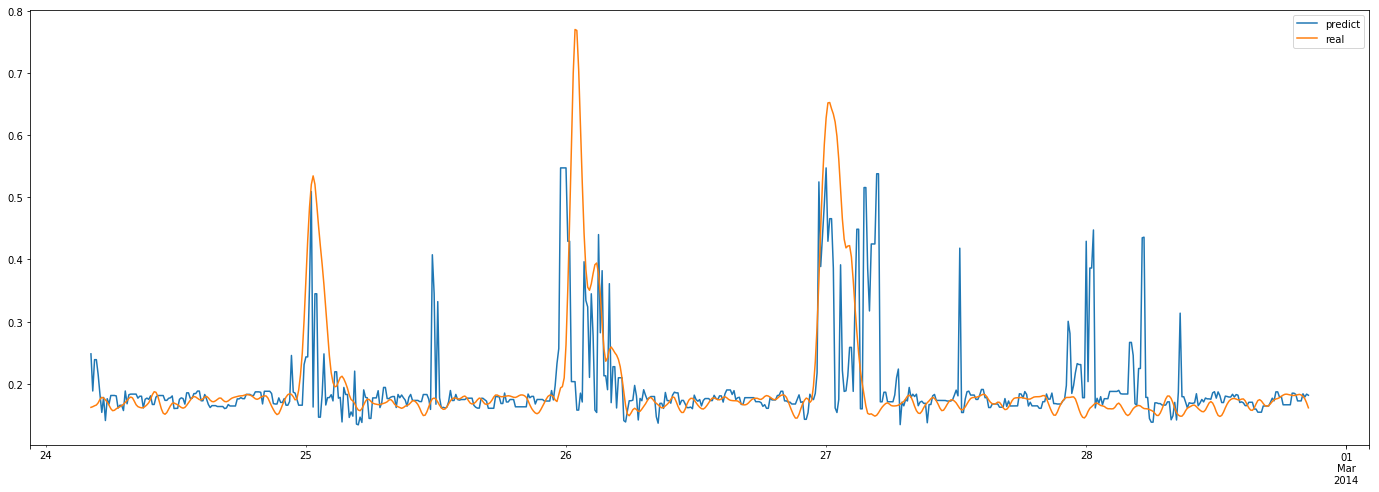

In [11]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem gradiente do VTEC em relação à Pirassununga

In [12]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00220815 -0.00170697 -0.00212731 -0.00298302 -0.00226343 -0.00263177
 -0.00229928 -0.00176698 -0.00248153 -0.0019963 ] 

O erro quadrático médio foi: 0.002436
O erro quadrático total foi: 2.961634
O maior erro por previsão foi: 0.421938
O erro relativo foi 9.845589%

Error for the time series sample:
O erro quadrático médio foi: 0.011273
O erro quadrático total foi: 2.758498
O maior erro por previsão foi: 0.584865
O erro relativo foi 22.301231%


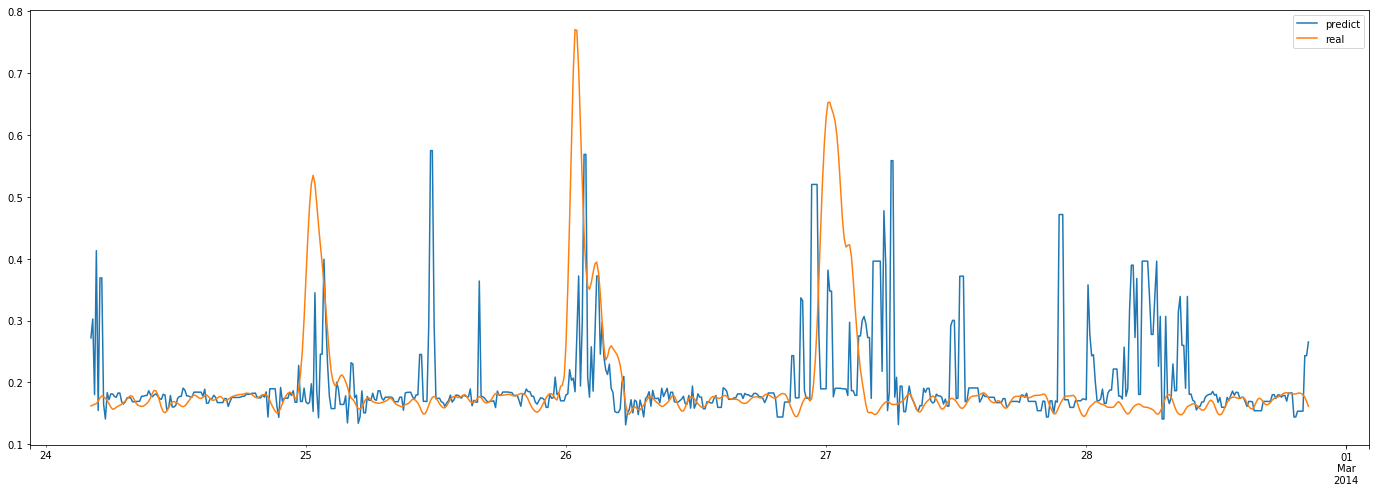

In [13]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal do gradiente do VTEC em relação à Pirassununga

In [14]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00204975 -0.00198862 -0.00172452 -0.00221024 -0.002141   -0.00223201
 -0.00246471 -0.00156535 -0.0020198  -0.00132026] 

O erro quadrático médio foi: 0.001804
O erro quadrático total foi: 2.548727
O maior erro por previsão foi: 0.384697
O erro relativo foi 8.684383%

Error for the time series sample:
O erro quadrático médio foi: 0.007384
O erro quadrático total foi: 2.232494
O maior erro por previsão foi: 0.521252
O erro relativo foi 15.889051%


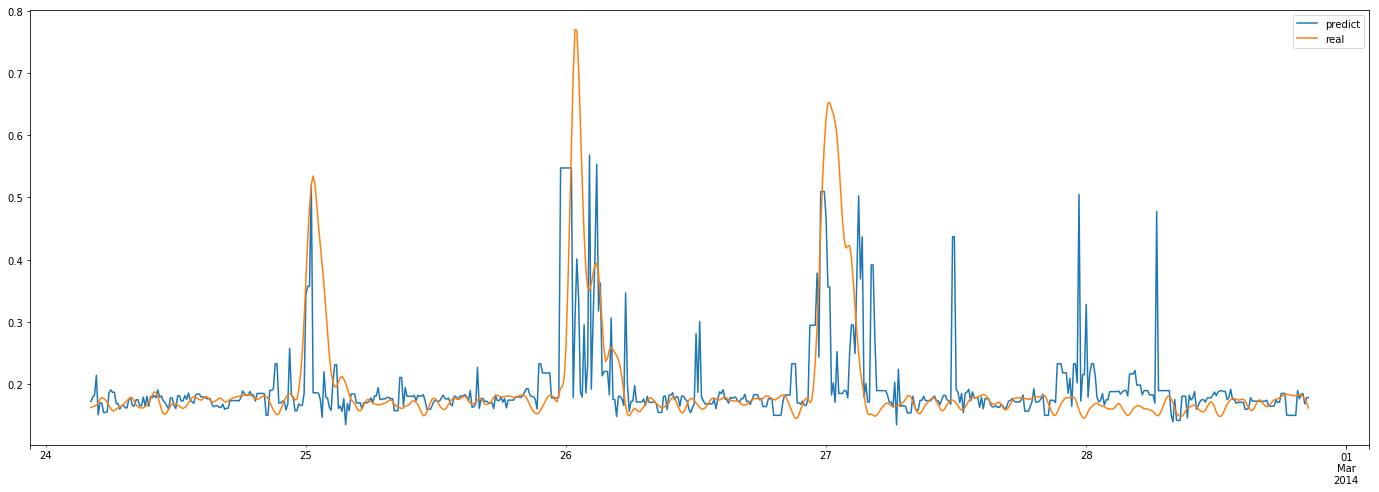

In [15]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem gradiente do VTEC em relação à Brasília

In [16]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00244747 -0.00236351 -0.00212323 -0.00246999 -0.00216769 -0.00244532
 -0.00260395 -0.00210567 -0.00210208 -0.00209944] 

O erro quadrático médio foi: 0.002097
O erro quadrático total foi: 2.747606
O maior erro por previsão foi: 0.393289
O erro relativo foi 9.404311%

Error for the time series sample:
O erro quadrático médio foi: 0.006772
O erro quadrático total foi: 2.138091
O maior erro por previsão foi: 0.548226
O erro relativo foi 17.064491%


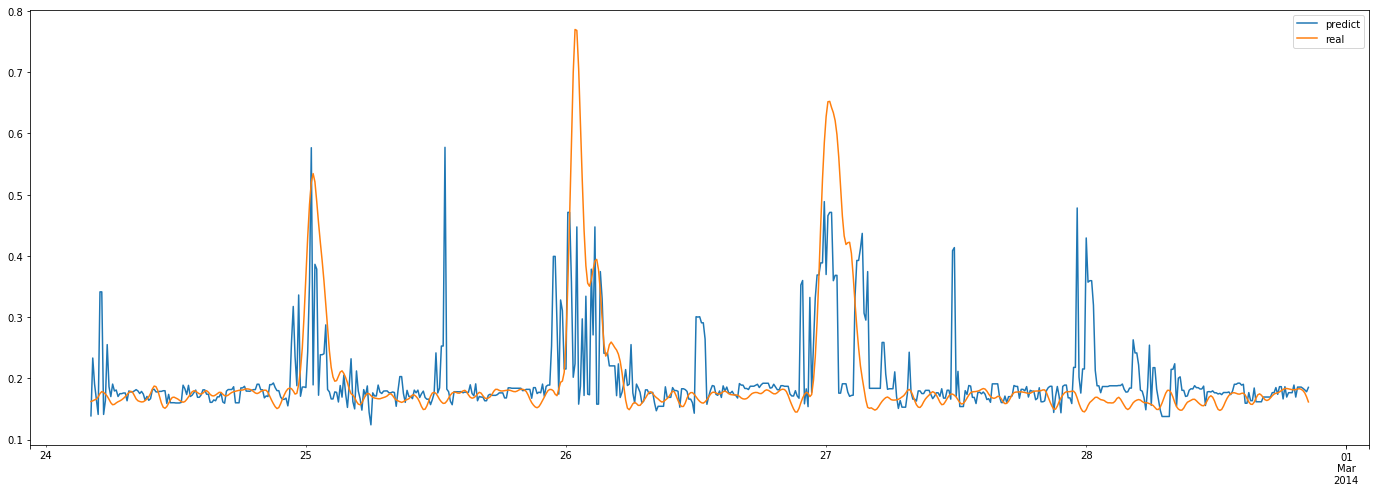

In [17]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal do gradiente do VTEC em relação à Brasília

In [18]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.0018816  -0.00185665 -0.00159006 -0.00242139 -0.00157289 -0.00236033
 -0.00216935 -0.00180265 -0.00210855 -0.00174693] 

O erro quadrático médio foi: 0.001726
O erro quadrático total foi: 2.492570
O maior erro por previsão foi: 0.393423
O erro relativo foi 8.755788%

Error for the time series sample:
O erro quadrático médio foi: 0.008186
O erro quadrático total foi: 2.350610
O maior erro por previsão foi: 0.566327
O erro relativo foi 16.865484%


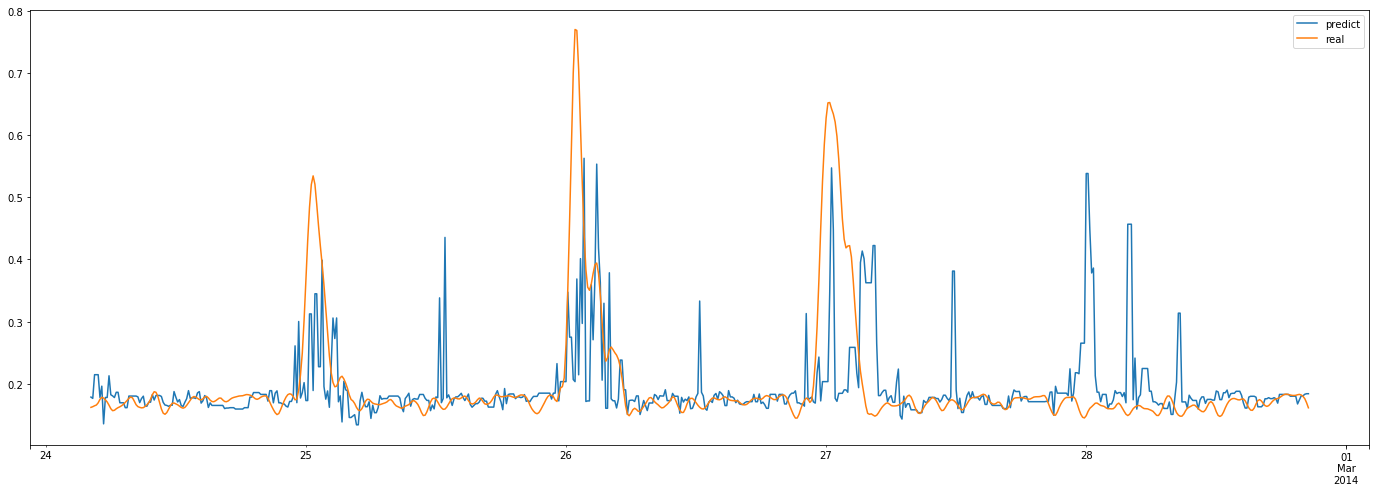

In [19]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));